In [5]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # 플롯의 seaborn 기본값 설정

In [6]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 데이터 설명
- Survived : 생존=1, 죽음=0
- Pclass : 승객등금. 1등급=1, 2등급=2, 3등급=3
- SibSp : 함께 탑승한 형제 또는 배우자 수
- Parch : 함께 탑승한 부모 또는 자녀 수
- ticket : 티켓 번호
- cabin : 선실 번호
- embarked : 탑승장소 S=Southhabmpton, C=Cherbourg, Q=Queenstown

In [9]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
def bar_chart(feature):
    survived = df_train[df_train['Survived'] == 1][feature].value_counts() 
    dead = df_train[df_train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df = df[sorted(df.columns.values)]
    df.plot(kind='bar',stacked=True,figsize=(10,5))

### 성별 생존
- 여성이 남성보다 생존할 가능성이 더 큼
- 애초에 남성이 여성보다 많은 것으로 확인 

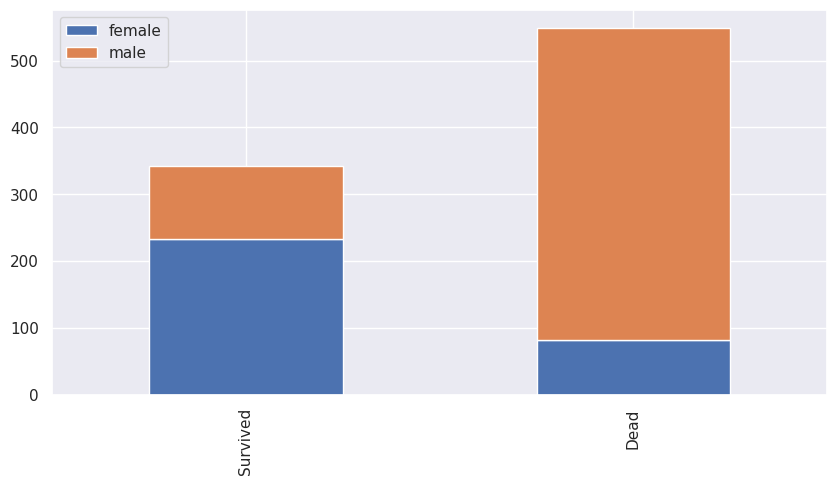

In [11]:
bar_chart("Sex")

### 탑승 등급별 생존
- 1등급 클래스가 다른 클래스보다 생존가능성이 더 높음
- 3등급 탑승객이 다른 등급 탑승객에 비해 많음

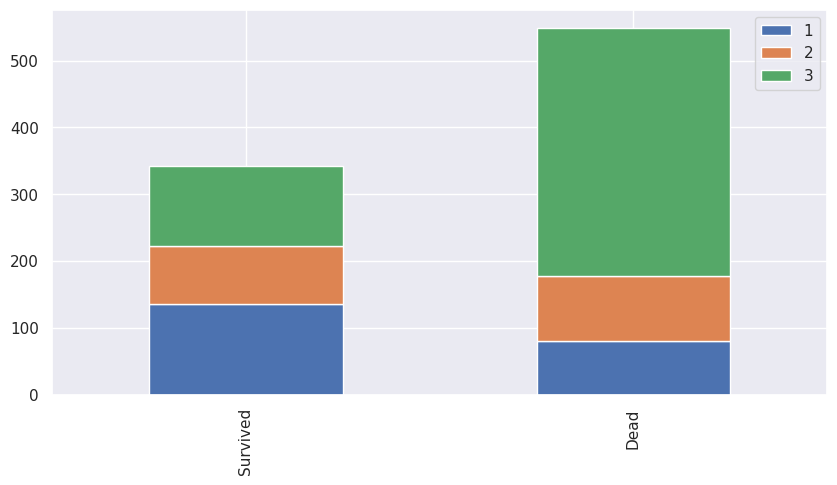

In [12]:
bar_chart('Pclass')

### 형제 자매수 생존
- 혼자인 사람의 생존자가 제일 많음
- 그러나 생존율로는 가족이 많을 수록 높아진다

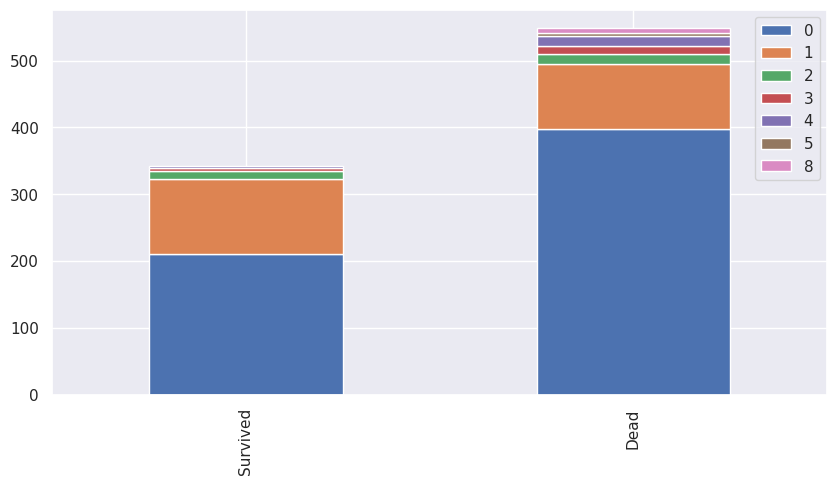

In [13]:
bar_chart("SibSp")

### 부모 자식수 생존
- 혼자인 사람의 생존자 수가 더 많음
- 그러나 생존율은 부모 자식이 있는 사람들이 더 높음

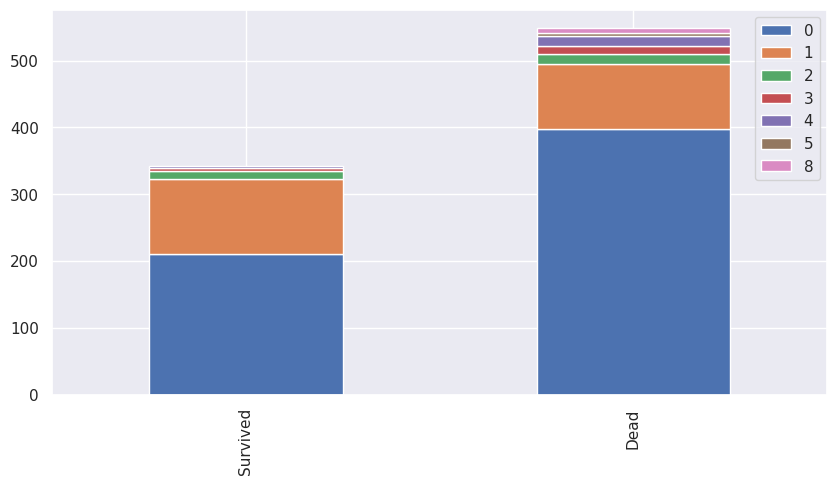

In [14]:
bar_chart("SibSp")

### 탑승지 생존
- S 탑승지가 가장 많은 생존자
- 그러나 생존율은 C 탑승지가 더 높다

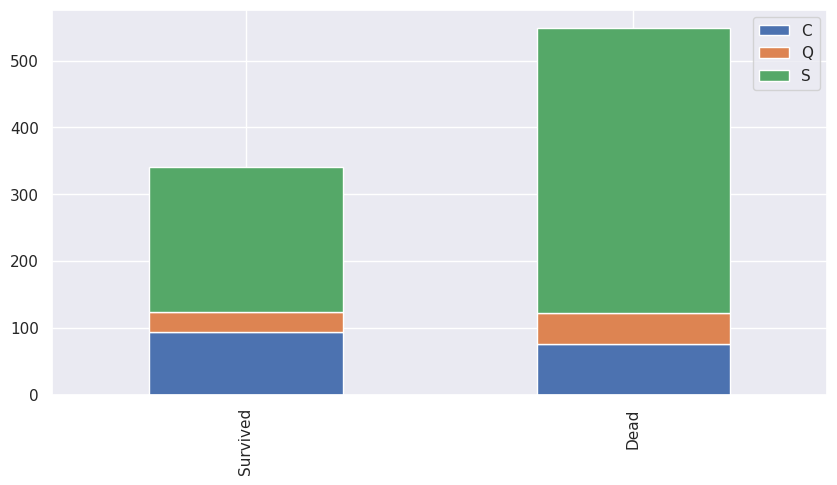

In [15]:
bar_chart('Embarked')